In [1]:
"""
Name: analysis.ipynb
Authors: Stephan Meighen-Berger
Example analysis
"""

'\nName: analysis.ipynb\nAuthors: Stephan Meighen-Berger\nExample analysis\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
import pandas as pd

In [3]:
# picture path
PICS = '../pics/'

In [4]:
# Time_cut
t_cut = 0
data_count = 30
photon_count = 1e10

In [5]:
# The realistic simulation
binned_data = []
times = []
frequencies = []
# fft_trafo = []
for i in range(data_count):
    # Loading data
    data = np.load('../data/storage/benchmark_v2_%s.npy' % str(i))
    org_times = np.load('../data/storage/benchmark_v2_time_%s.npy' % str(i))
    # Processing
    # Adding 0 at the beginning and end
    tmp_data = np.insert(data, [0, -1], [0., 0.])
    step = np.diff(org_times)[0]
    tmp_times = np.insert(org_times, [-2, -1], [org_times[-1] + step, org_times[-1] + 2 * step])
    # Processed
    binned_data.append(tmp_data[t_cut:] * photon_count)
    times.append(tmp_times[t_cut:])
    # FFT
    # frequencies.append(np.fft.fftfreq(binned_data[-1].size, d=np.diff(times[-1])[0]))
    # fft_trafo.append(np.abs(np.fft.fft(np.sqrt(binned_data[-1])))**2.)

In [6]:
# The approximation (no vortices)
binned_data_approx = []
times_approx = []
frequencies_approx = []
# fft_trafo_approx = []
for i in range(data_count):
    # Loading data
    data_approx = np.load('../data/storage/potential_v2_%s.npy' % str(i))
    org_times_approx = np.load('../data/storage/potential_v2_time_%s.npy' % str(i))
    # Processing
    # Adding 0 at the beginning and end
    tmp_data_approx = np.insert(data_approx, [0, -1], [0., 0.])
    step_approx = np.diff(org_times_approx)[0]
    tmp_times_approx = np.insert(org_times_approx, [-2, -1],
                                 [org_times_approx[-1] + step_approx, org_times_approx[-1] + 2 * step_approx])
    # Processed
    binned_data_approx.append(tmp_data_approx[t_cut:])
    times_approx.append(tmp_times_approx[t_cut:])
    # FFT
    # frequencies_approx.append(np.fft.fftfreq(binned_data_approx[-1].size, d=np.diff(times_approx[-1])[0]))
    # fft_trafo_approx.append(np.abs(np.fft.fft(np.sqrt(binned_data_approx[-1])))**2.)

In [26]:
smoothing_window = 201

In [27]:
# Average smoothed realistic
average = np.nan_to_num(np.average(binned_data, axis=0))
# average = average - np.mean(average)
average_fft = np.abs(np.fft.fft(average))
frequencies_average = np.fft.fftfreq(average.size, d=np.diff(times[-1])[0])
data_smoothed = np.array([
    pd.Series(binned_data[i]).rolling(window=smoothing_window, center=True, min_periods=1).mean()
    for i in range(data_count)
])
# data_smoothed = np.array([(data_smoothed[i] - np.mean(data_smoothed[i])).flatten() for i in range(data_count)])
average_smoothed = np.average(data_smoothed, axis=0)
average_smoothed_fft = np.abs(np.fft.fft(np.sqrt(average_smoothed))**2.)
frequencies_smoothed = np.fft.fftfreq(average_smoothed.size, d=np.diff(times[-1])[0])
# Average smoothed approx
data_smoothed = np.array([
    pd.Series(binned_data_approx[i]).rolling(window=smoothing_window, center=True, min_periods=1).mean()
    for i in range(data_count)
])
# data_smoothed = np.array([(data_smoothed[i] - np.mean(data_smoothed[i])).flatten() for i in range(data_count)])
average_smoothed_approx = np.average(data_smoothed, axis=0)
average_smoothed_fft_approx = np.abs(np.fft.fft(np.sqrt(average_smoothed_approx))**2.)
frequencies_smoothed_approx = np.fft.fftfreq(average_smoothed_approx.size, d=np.diff(times[-1])[0])

In [28]:
# Plotting standards
std_size = 20.
fontsize = 30.
lw=3.
h_length=1.5

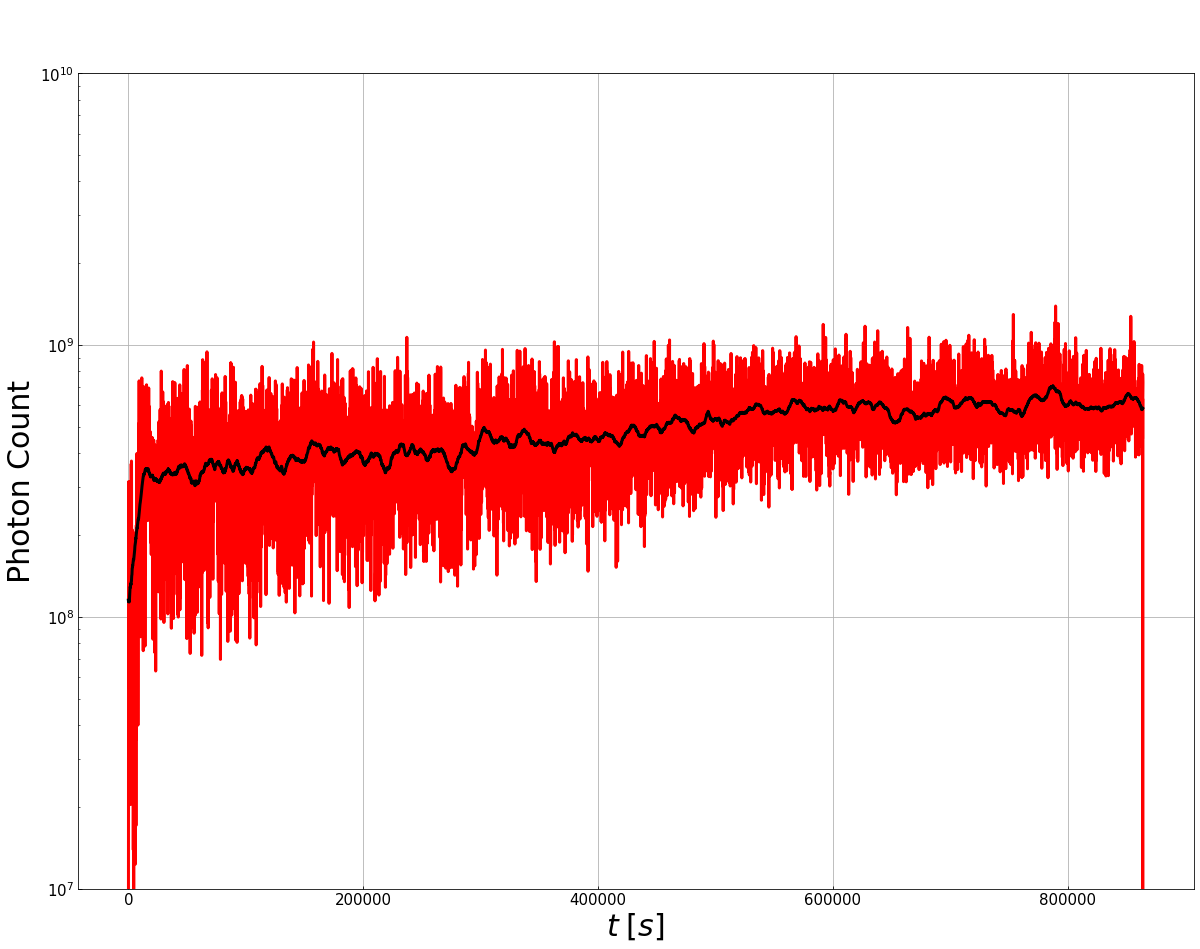

In [29]:
# Time distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# Realistic
ax1.plot(
    times[0],
    average,
    lw=lw, color='r', ls='-'
)
ax1.plot(
    times[0],
    average_smoothed,
    lw=lw, color='k',
)
# Approx
# ax1.plot(
#     times_approx[0],
#     average_approx,
#     lw=lw, color='b', ls='-'
# )
# ax1.plot(
#     times_approx[0],
#     average_smoothed_approx,
#     lw=lw, color='y',
# )
# ax1.set_xlim(0, 720 * 60 * 4)
ax1.set_ylim(1e7, 1e10)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax1.set_ylabel(r'Photon Count', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize/2, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize/2, direction='in')
ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.show()

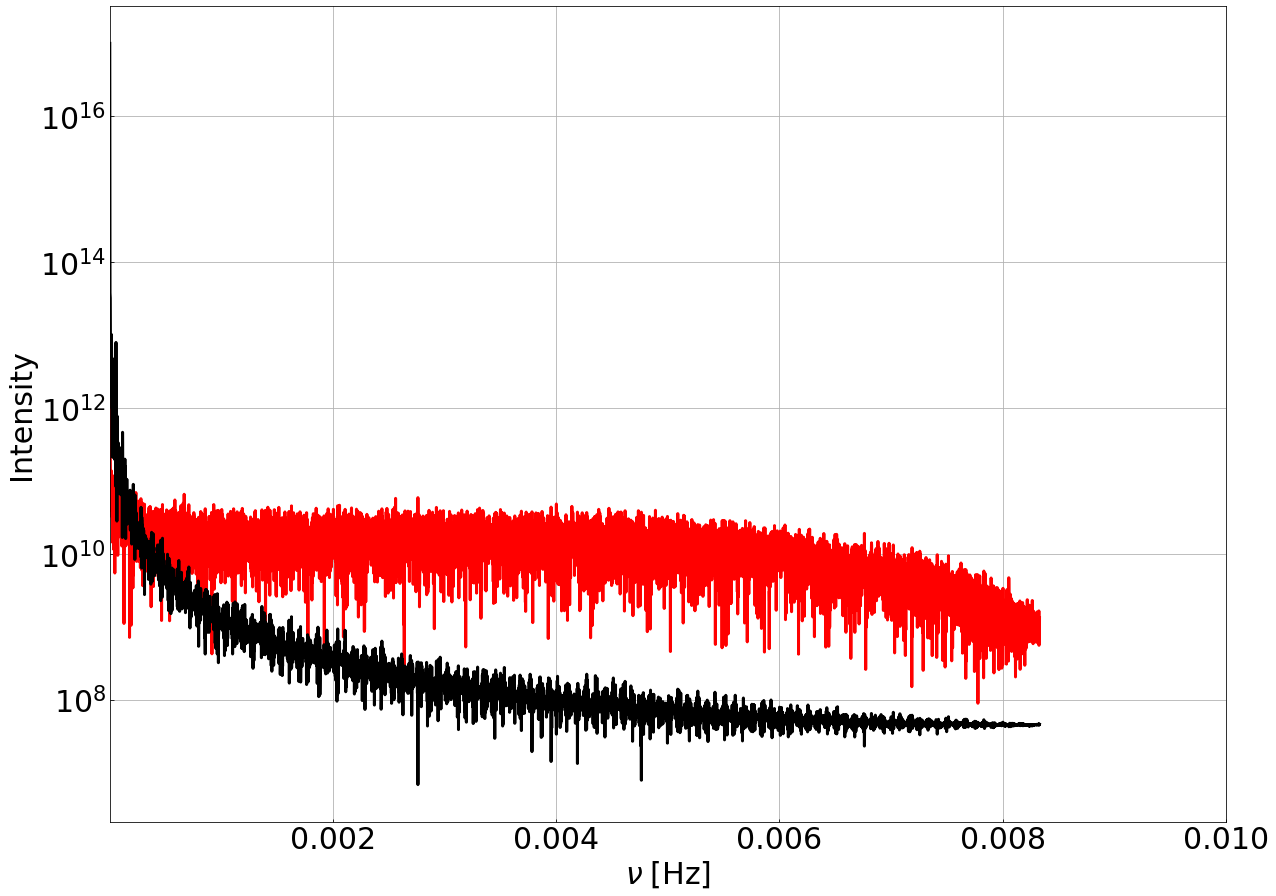

In [30]:
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
cut_off = np.argmax(frequencies_average)
ax1.plot(frequencies_average[:cut_off],
         average_fft[:cut_off],
         ls='-',
         color='r',
         lw=lw)
cut_off = np.argmax(frequencies_smoothed)
ax1.plot(frequencies_smoothed[:cut_off],
         average_smoothed_fft[:cut_off],
         color='k',
         lw=lw)
# cut_off = np.argmax(frequencies_approx)
# ax1.plot(frequencies_approx[:cut_off],
#          average_fft_approx[:cut_off],
#          ls='-',
#          color='b',
#          lw=lw)
# cut_off = np.argmax(frequencies_smoothed_approx)
# ax1.plot(frequencies_smoothed_approx[:cut_off],
#          average_smoothed_fft_approx[:cut_off],
#          color='y',
#          lw=lw)
ax1.set_xlim(1e-10, 1e-2)
# ax1.set_ylim(0, 1e1)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\nu\;[$Hz$]$', fontsize=fontsize)
ax1.set_ylabel(r'Intensity', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.grid(True)
# h, l = ax1.get_legend_handles_labels()
# lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.1),
#                   ncol=2, fontsize=fontsize, handlelength=h_length,
#                   fancybox=True, frameon=False)
# lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.1),
#                   ncol=2, fontsize=fontsize, handlelength=h_length,
#                   fancybox=True, frameon=False)
# ax1.add_artist(lgd1)
plt.show()

In [21]:
figure.savefig(PICS + "FFT.png",
               bbox_inches='tight')